References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-5-derivatives-of-trigonometric-functions
    
[2] Checkpoint 3.33
$$
\begin{equation}
s(t)=2sin t
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, 2*sin(x))
x:[-3.14159265 -2.87979327 -2.61799388 -2.35619449 -2.0943951  -1.83259571
 -1.57079633 -1.30899694 -1.04719755 -0.78539816 -0.52359878 -0.26179939
  0.          0.26179939  0.52359878  0.78539816  1.04719755  1.30899694
  1.57079633  1.83259571  2.0943951   2.35619449  2.61799388  2.87979327
  3.14159265]
y:[-2.44929359829471e-16, -0.517638090205042, -1.00000000000000, -1.41421356237310, -1.73205080756888, -1.93185165257814, -2.00000000000000, -1.93185165257814, -1.73205080756888, -1.41421356237309, -1.00000000000000, -0.517638090205042, 0, 0.517638090205041, 1.00000000000000, 1.41421356237309, 1.73205080756888, 1.93185165257814, 2.00000000000000, 1.93185165257814, 1.73205080756888, 1.41421356237310, 1.00000000000000, 0.517638090205043, 2.44929359829471e-16]
f′(x)=2*cos(x)
f′′(x)=-2*sin(x)
f′(2.6179938779914944)=-1.73205080756888
y_tangent:[10.9758965032882 10.5224466622296 10.0689968211711 9.61

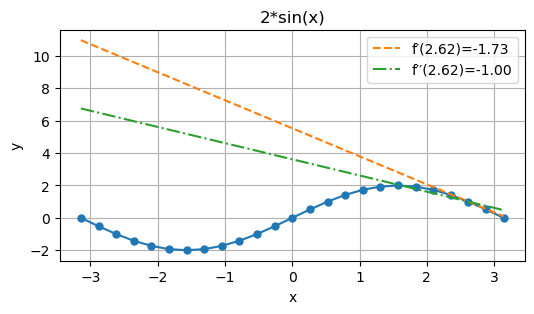

In [9]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, 2 * sp.sin(x))
print(f)

x_values = np.linspace(-np.pi, np.pi, 25)
print(f"x:{x_values}")
y_values = list(map(f, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

f2_derivative = sp.diff(f_prime, x)
print(f"f′′(x)={f2_derivative}")

x_at = 5 * np.pi / 6


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)
slope2, y2_tangent = calculate_slope(f2_derivative, 2)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5)
axes.plot(x_values, y_tangent, label=f"f′({x_at:.2f})={slope:.2f}", linestyle="--")
axes.plot(x_values, y2_tangent, label=f"f′′({x_at:.2f})={slope2:.2f}", linestyle="-.")
axes.legend()
plt.show()